In this exercise, you will teleport the quantum state
$$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$$ from Alice's qubit to Bob's qubit. Recall that the teleportation algorithm consists of four major components:

1. Initializing the state to be teleported. We will do this on Alice's qubit `q0`.
2. Creating entanglement between two qubits. We will use qubits `q1` and `q2` for this. Recall that Alice owns `q1`, and Bob owns `q2`.
3. Applying a Bell measurement on Alice's qubits `q0` and `q1`.
4. Applying classically controlled operations on Bob's qubit `q2` depending on the outcomes of the Bell measurement on Alice's qubits.

This exercise guides you through each of these steps.

In [ ]:
# Importing standard Qiskit libraries
!pip install qiskit
from qiskit import QuantumCircuit  #Importing the QuantumCircuit function from Qiskit. We will use this to create our quantum circuits!

# We will use these functions to run our circuit and visualize its final state
from qiskit import Aer, execute
from qiskit.visualization import *
import math
import warnings  # We are using this library to suppress some warning messages
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.6 MB/s eta 0:00:00


### Initializing the state to be teleported

First, create a quantum circuit that creates the state $$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$$ You can do this by using `Qiskit`'s `initialize` function.

In [ ]:
def initialize_qubit(given_circuit, qubit_index):

    import numpy as np
    ### WRITE YOUR CODE BETWEEN THESE LINES - START

    # define the input state
    input_state = [0.7**0.5, 0.3**0.5]

    # create a quantum circuit with the number of qubits
    given_circuit = QuantumCircuit(qubit_index + 1)

    # initialize the qubits to the input state
    given_circuit.initialize(input_state, qubit_index)

    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return given_circuit

Next, we need to create entanglement between Alice's and Bob's qubits.

In [ ]:
def entangle_qubits(given_circuit, qubit_Alice, qubit_Bob):

    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.barrier()
    given_circuit.cnot(qubit_Alice, qubit_Bob)

    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return given_circuit

Next, we need to do a Bell measurement of Alice's qubits.

In [ ]:
def bell_meas_Alice_qubits(given_circuit, qubit1_Alice, qubit2_Alice, clbit1_Alice, clbit2_Alice):

    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.barrier()
    given_circuit.measure(qubit1_Alice, clbit1_Alice)
    given_circuit.measure(qubit2_Alice, clbit2_Alice)
    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return given_circuit

Finally, we apply controlled operations on Bob's qubit. Recall that the controlled operations are applied in this order:

- an $X$ gate is applied on Bob's qubit if the measurement coutcome of Alice's second qubit, `clbit2_Alice`, is `1`.
- a $Z$ gate is applied on Bob's qubit if the measurement coutcome of Alice's first qubit, `clbit1_Alice`, is `1`.



In [ ]:
def controlled_ops_Bob_qubit(given_circuit, qubit_Bob, clbit1_Alice, clbit2_Alice):

    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.x(qubit_Bob).c_if(clbit2_Alice, 1) # Apply gates if the registers
    given_circuit.z(qubit_Bob).c_if(clbit1_Alice, 1) # are in the state '1'
    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return given_circuit

The next lines of code put everything together. **You do not need to modify anything below, but you will need to run the cell.**

In [ ]:
### imports
from qiskit import QuantumRegister, ClassicalRegister

### set up the qubits and classical bits
all_qubits_Alice = QuantumRegister(2)
all_qubits_Bob = QuantumRegister(1)
creg1_Alice = ClassicalRegister(1)
creg2_Alice = ClassicalRegister(1)

### quantum teleportation circuit here

# Initialize
mycircuit = QuantumCircuit(all_qubits_Alice, all_qubits_Bob, creg1_Alice, creg2_Alice)
initialize_qubit(mycircuit, 0)
mycircuit.barrier()

# Entangle
entangle_qubits(mycircuit, 1, 2)
mycircuit.barrier()

# Do a Bell measurement
bell_meas_Alice_qubits(mycircuit, all_qubits_Alice[0], all_qubits_Alice[1], creg1_Alice, creg2_Alice)
mycircuit.barrier()

# Apply classically controlled quantum gates
controlled_ops_Bob_qubit(mycircuit, all_qubits_Bob[0], creg1_Alice, creg2_Alice)

### Look at the complete circuit
mycircuit.draw()

░       ░  ░ ┌─┐    ░               
q10_0: ─░───────░──░─┤M├────░───────────────
        ░       ░  ░ └╥┘┌─┐ ░               
q10_1: ─░───■───░──░──╫─┤M├─░───────────────
        ░ ┌─┴─┐ ░  ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
  q11: ─░─┤ X ├─░──░──╫──╫──░──┤ X ├──┤ Z ├─
        ░ └───┘ ░  ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                      ║  ║       ║   ┌──╨──┐
 c8: 1/═══════════════╩══╬═══════╬═══╡ 0x1 ╞
                      0  ║    ┌──╨──┐└─────┘
 c9: 1/══════════════════╩════╡ 0x1 ╞═══════
                         0    └─────┘

### Part II (Graduate section only)
Write a quantum program for the following problem:
Let d be the number of positions at which two binary strings of equal length differ. For example,
if we have two binary numbers "10101" and "11101", their d is 1, because they differ in only one
position (the second bit from the right).
Input to your program will be two binary strings and output from classical bits should be binary
format of d. Then finally convert d it to decimal format by simple known logic.
Example: -
If a, b are two inputs to the circuit a = 100011; b = 111111 then classical bits output will be be
011 and final output will be 3
d (100011,111111) = 3.
Notes:
1. Do not use Quantum Fourier transforms or Phase estimation.
2. Do this assignment with controlled gates and basic known gates.
3. Your code should be generalized to any length of the binary strings.
Deliverables:
1) Submit the code in .py format or .ipynb format with detailed comments.
2) Report explaining your circuit with above example. { a = 100011; b = 111111 }
Deadline: May 4th, 2023

# First implementation using 6 classical bits for output and counting the number of 1's in the classical output using classical code.

In [ ]:
from qiskit import QuantumCircuit, Aer, execute

# Set the input strings a and b
a = "100011"
b = "111111"
n = len(a)

# Create a quantum circuit with 2n qubits and n classical bits
qc = QuantumCircuit(2*n, n)

# Encoding the binary strings a and b into the quantum circuit
for i in range(n):
    if a[i] == "1":
        qc.x(i)
    if b[i] == "1":
        qc.x(i+n)

qc.draw()

┌───┐
 q_0: ┤ X ├
      └───┘
 q_1: ─────
           
 q_2: ─────
           
 q_3: ─────
      ┌───┐
 q_4: ┤ X ├
      ├───┤
 q_5: ┤ X ├
      ├───┤
 q_6: ┤ X ├
      ├───┤
 q_7: ┤ X ├
      ├───┤
 q_8: ┤ X ├
      ├───┤
 q_9: ┤ X ├
      ├───┤
q_10: ┤ X ├
      ├───┤
q_11: ┤ X ├
      └───┘
 c: 6/═════

In [ ]:
# Applying CNOT gates to get the difference between the two binary numbers
qc.barrier()
for i in range(n):
    qc.cx(i, i+n)

qc.draw()

┌───┐ ░                               
 q_0: ┤ X ├─░───■───────────────────────────
      └───┘ ░   │                           
 q_1: ──────░───┼────■──────────────────────
            ░   │    │                      
 q_2: ──────░───┼────┼────■─────────────────
            ░   │    │    │                 
 q_3: ──────░───┼────┼────┼────■────────────
      ┌───┐ ░   │    │    │    │            
 q_4: ┤ X ├─░───┼────┼────┼────┼────■───────
      ├───┤ ░   │    │    │    │    │       
 q_5: ┤ X ├─░───┼────┼────┼────┼────┼────■──
      ├───┤ ░ ┌─┴─┐  │    │    │    │    │  
 q_6: ┤ X ├─░─┤ X ├──┼────┼────┼────┼────┼──
      ├───┤ ░ └───┘┌─┴─┐  │    │    │    │  
 q_7: ┤ X ├─░──────┤ X ├──┼────┼────┼────┼──
      ├───┤ ░      └───┘┌─┴─┐  │    │    │  
 q_8: ┤ X ├─░───────────┤ X ├──┼────┼────┼──
      ├───┤ ░           └───┘┌─┴─┐  │    │  
 q_9: ┤ X ├─░────────────────┤ X ├──┼────┼──
      ├───┤ ░                └───┘┌─┴─┐  │  
q_10: ┤ X ├─░─────────────────────┤ X ├──┼──
      ├───┤ ░                     └───┘┌─┴─┐
q_11: ┤ X ├─░──────────────────────────┤ X ├
      └───┘ ░                          └───┘
 c: 6/══════════════════════════════════════

In [ ]:
# Measuring
qc.barrier()
for i in range(n):
    qc.measure(i+n, i)
qc.draw()

┌───┐ ░                                ░                   
 q_0: ┤ X ├─░───■────────────────────────────░───────────────────
      └───┘ ░   │                            ░                   
 q_1: ──────░───┼────■───────────────────────░───────────────────
            ░   │    │                       ░                   
 q_2: ──────░───┼────┼────■──────────────────░───────────────────
            ░   │    │    │                  ░                   
 q_3: ──────░───┼────┼────┼────■─────────────░───────────────────
      ┌───┐ ░   │    │    │    │             ░                   
 q_4: ┤ X ├─░───┼────┼────┼────┼────■────────░───────────────────
      ├───┤ ░   │    │    │    │    │        ░                   
 q_5: ┤ X ├─░───┼────┼────┼────┼────┼────■───░───────────────────
      ├───┤ ░ ┌─┴─┐  │    │    │    │    │   ░ ┌─┐               
 q_6: ┤ X ├─░─┤ X ├──┼────┼────┼────┼────┼───░─┤M├───────────────
      ├───┤ ░ └───┘┌─┴─┐  │    │    │    │   ░ └╥┘┌─┐            
 q_7: ┤ X ├─░──────┤ X ├──┼────┼────┼────┼───░──╫─┤M├────────────
      ├───┤ ░      └───┘┌─┴─┐  │    │    │   ░  ║ └╥┘┌─┐         
 q_8: ┤ X ├─░───────────┤ X ├──┼────┼────┼───░──╫──╫─┤M├─────────
      ├───┤ ░           └───┘┌─┴─┐  │    │   ░  ║  ║ └╥┘┌─┐      
 q_9: ┤ X ├─░────────────────┤ X ├──┼────┼───░──╫──╫──╫─┤M├──────
      ├───┤ ░                └───┘┌─┴─┐  │   ░  ║  ║  ║ └╥┘┌─┐   
q_10: ┤ X ├─░─────────────────────┤ X ├──┼───░──╫──╫──╫──╫─┤M├───
      ├───┤ ░                     └───┘┌─┴─┐ ░  ║  ║  ║  ║ └╥┘┌─┐
q_11: ┤ X ├─░──────────────────────────┤ X ├─░──╫──╫──╫──╫──╫─┤M├
      └───┘ ░                          └───┘ ░  ║  ║  ║  ║  ║ └╥┘
 c: 6/══════════════════════════════════════════╩══╩══╩══╩══╩══╩═
                                                0  1  2  3  4  5

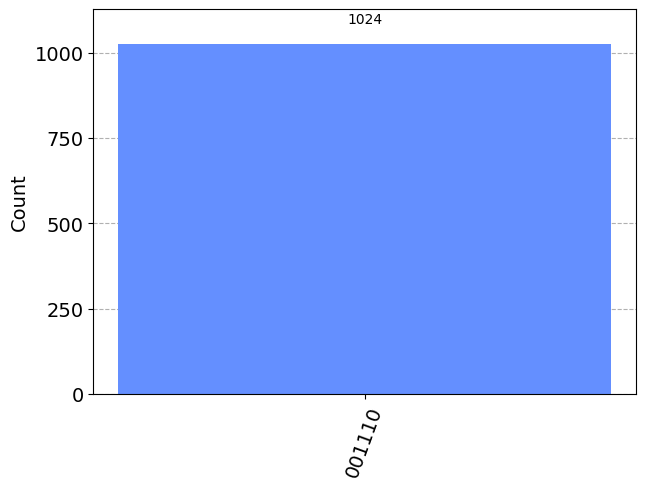

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()
counts = result.get_counts(qc)
plot_histogram(counts)

In [ ]:
# Count the number of qubits in the state |1⟩
num_ones = 0
if a == b:
  num_ones = 0
else:
  for key in counts.keys():
      num_ones += key.count("1")

print("Difference, d:", num_ones)

Difference, d: 3


### Implementation 2: Attempt to count the number of 1's after the CNOT layer using adder quantum logic and get the output in log(n) bits where n is the length of the binary number.

In [ ]:
from qiskit import QuantumCircuit, Aer, execute

# Set the input strings a and b
a = "100011"
b = "111111"
n = len(a)
classical_regs = round(math.log(n) + 1) # 1 is added to raise the output up 1, due to rounding taking the output 1 down

# Create a quantum circuit with 2n qubits and n classical bits
qc = QuantumCircuit(2*n, classical_regs)

# Encoding the binary strings a and b into the quantum circuit
for i in range(n):
    if a[i] == "1":
        qc.x(i)
    if b[i] == "1":
        qc.x(i+n)

qc.draw()

┌───┐
 q_0: ┤ X ├
      └───┘
 q_1: ─────
           
 q_2: ─────
           
 q_3: ─────
      ┌───┐
 q_4: ┤ X ├
      ├───┤
 q_5: ┤ X ├
      ├───┤
 q_6: ┤ X ├
      ├───┤
 q_7: ┤ X ├
      ├───┤
 q_8: ┤ X ├
      ├───┤
 q_9: ┤ X ├
      ├───┤
q_10: ┤ X ├
      ├───┤
q_11: ┤ X ├
      └───┘
 c: 3/═════

In [ ]:
# Applying CNOT gates to get the difference between the two binary numbers
qc.barrier()
for i in range(n):
    qc.cx(i, i+n)

qc.draw()

┌───┐ ░                               
 q_0: ┤ X ├─░───■───────────────────────────
      └───┘ ░   │                           
 q_1: ──────░───┼────■──────────────────────
            ░   │    │                      
 q_2: ──────░───┼────┼────■─────────────────
            ░   │    │    │                 
 q_3: ──────░───┼────┼────┼────■────────────
      ┌───┐ ░   │    │    │    │            
 q_4: ┤ X ├─░───┼────┼────┼────┼────■───────
      ├───┤ ░   │    │    │    │    │       
 q_5: ┤ X ├─░───┼────┼────┼────┼────┼────■──
      ├───┤ ░ ┌─┴─┐  │    │    │    │    │  
 q_6: ┤ X ├─░─┤ X ├──┼────┼────┼────┼────┼──
      ├───┤ ░ └───┘┌─┴─┐  │    │    │    │  
 q_7: ┤ X ├─░──────┤ X ├──┼────┼────┼────┼──
      ├───┤ ░      └───┘┌─┴─┐  │    │    │  
 q_8: ┤ X ├─░───────────┤ X ├──┼────┼────┼──
      ├───┤ ░           └───┘┌─┴─┐  │    │  
 q_9: ┤ X ├─░────────────────┤ X ├──┼────┼──
      ├───┤ ░                └───┘┌─┴─┐  │  
q_10: ┤ X ├─░─────────────────────┤ X ├──┼──
      ├───┤ ░                     └───┘┌─┴─┐
q_11: ┤ X ├─░──────────────────────────┤ X ├
      └───┘ ░                          └───┘
 c: 3/══════════════════════════════════════

In [ ]:
# Applying Toffoli gates to count the number of 1's from the output of CNOT gates that represent the bits that are different
qc.barrier()
for i in range(1, n):
    for j in range(n, 2*n - i - 1): # Toffoli gate are applied in the b string part as the CNOT gates result is reflected here
        qc.ccx(j, j + i, j + i + 1)
qc.draw()

┌───┐ ░                                ░                               »
 q_0: ┤ X ├─░───■────────────────────────────░───────────────────────────────»
      └───┘ ░   │                            ░                               »
 q_1: ──────░───┼────■───────────────────────░───────────────────────────────»
            ░   │    │                       ░                               »
 q_2: ──────░───┼────┼────■──────────────────░───────────────────────────────»
            ░   │    │    │                  ░                               »
 q_3: ──────░───┼────┼────┼────■─────────────░───────────────────────────────»
      ┌───┐ ░   │    │    │    │             ░                               »
 q_4: ┤ X ├─░───┼────┼────┼────┼────■────────░───────────────────────────────»
      ├───┤ ░   │    │    │    │    │        ░                               »
 q_5: ┤ X ├─░───┼────┼────┼────┼────┼────■───░───────────────────────────────»
      ├───┤ ░ ┌─┴─┐  │    │    │    │    │   ░                               »
 q_6: ┤ X ├─░─┤ X ├──┼────┼────┼────┼────┼───░───■───────────────────■───────»
      ├───┤ ░ └───┘┌─┴─┐  │    │    │    │   ░   │                   │       »
 q_7: ┤ X ├─░──────┤ X ├──┼────┼────┼────┼───░───■────■──────────────┼────■──»
      ├───┤ ░      └───┘┌─┴─┐  │    │    │   ░ ┌─┴─┐  │              │    │  »
 q_8: ┤ X ├─░───────────┤ X ├──┼────┼────┼───░─┤ X ├──■────■─────────■────┼──»
      ├───┤ ░           └───┘┌─┴─┐  │    │   ░ └───┘┌─┴─┐  │       ┌─┴─┐  │  »
 q_9: ┤ X ├─░────────────────┤ X ├──┼────┼───░──────┤ X ├──■────■──┤ X ├──■──»
      ├───┤ ░                └───┘┌─┴─┐  │   ░      └───┘┌─┴─┐  │  └───┘┌─┴─┐»
q_10: ┤ X ├─░─────────────────────┤ X ├──┼───░───────────┤ X ├──■───────┤ X ├»
      ├───┤ ░                     └───┘┌─┴─┐ ░           └───┘┌─┴─┐     └───┘»
q_11: ┤ X ├─░──────────────────────────┤ X ├─░────────────────┤ X ├──────────»
      └───┘ ░                          └───┘ ░                └───┘          »
 c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                             »
«                          
« q_0: ────────────────────
«                          
« q_1: ────────────────────
«                          
« q_2: ────────────────────
«                          
« q_3: ────────────────────
«                          
« q_4: ────────────────────
«                          
« q_5: ────────────────────
«                          
« q_6: ───────■─────────■──
«             │         │  
« q_7: ───────┼────■────┼──
«             │    │    │  
« q_8: ──■────┼────┼────┼──
«        │    │    │    │  
« q_9: ──┼────■────┼────┼──
«        │  ┌─┴─┐  │    │  
«q_10: ──■──┤ X ├──■────■──
«      ┌─┴─┐└───┘┌─┴─┐┌─┴─┐
«q_11: ┤ X ├─────┤ X ├┤ X ├
«      └───┘     └───┘└───┘
« c: 3/════════════════════
«

In [ ]:
# Measuring
qc.barrier()
for i in range(classical_regs):
   qc.measure(n+i, i) # The first three bits in the b string would give the binary number associated with the count of 1's
qc.draw()

┌───┐ ░                                ░                               »
 q_0: ┤ X ├─░───■────────────────────────────░───────────────────────────────»
      └───┘ ░   │                            ░                               »
 q_1: ──────░───┼────■───────────────────────░───────────────────────────────»
            ░   │    │                       ░                               »
 q_2: ──────░───┼────┼────■──────────────────░───────────────────────────────»
            ░   │    │    │                  ░                               »
 q_3: ──────░───┼────┼────┼────■─────────────░───────────────────────────────»
      ┌───┐ ░   │    │    │    │             ░                               »
 q_4: ┤ X ├─░───┼────┼────┼────┼────■────────░───────────────────────────────»
      ├───┤ ░   │    │    │    │    │        ░                               »
 q_5: ┤ X ├─░───┼────┼────┼────┼────┼────■───░───────────────────────────────»
      ├───┤ ░ ┌─┴─┐  │    │    │    │    │   ░                               »
 q_6: ┤ X ├─░─┤ X ├──┼────┼────┼────┼────┼───░───■───────────────────■───────»
      ├───┤ ░ └───┘┌─┴─┐  │    │    │    │   ░   │                   │       »
 q_7: ┤ X ├─░──────┤ X ├──┼────┼────┼────┼───░───■────■──────────────┼────■──»
      ├───┤ ░      └───┘┌─┴─┐  │    │    │   ░ ┌─┴─┐  │              │    │  »
 q_8: ┤ X ├─░───────────┤ X ├──┼────┼────┼───░─┤ X ├──■────■─────────■────┼──»
      ├───┤ ░           └───┘┌─┴─┐  │    │   ░ └───┘┌─┴─┐  │       ┌─┴─┐  │  »
 q_9: ┤ X ├─░────────────────┤ X ├──┼────┼───░──────┤ X ├──■────■──┤ X ├──■──»
      ├───┤ ░                └───┘┌─┴─┐  │   ░      └───┘┌─┴─┐  │  └───┘┌─┴─┐»
q_10: ┤ X ├─░─────────────────────┤ X ├──┼───░───────────┤ X ├──■───────┤ X ├»
      ├───┤ ░                     └───┘┌─┴─┐ ░           └───┘┌─┴─┐     └───┘»
q_11: ┤ X ├─░──────────────────────────┤ X ├─░────────────────┤ X ├──────────»
      └───┘ ░                          └───┘ ░                └───┘          »
 c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                             »
«                           ░          
« q_0: ─────────────────────░──────────
«                           ░          
« q_1: ─────────────────────░──────────
«                           ░          
« q_2: ─────────────────────░──────────
«                           ░          
« q_3: ─────────────────────░──────────
«                           ░          
« q_4: ─────────────────────░──────────
«                           ░          
« q_5: ─────────────────────░──────────
«                           ░ ┌─┐      
« q_6: ───────■─────────■───░─┤M├──────
«             │         │   ░ └╥┘┌─┐   
« q_7: ───────┼────■────┼───░──╫─┤M├───
«             │    │    │   ░  ║ └╥┘┌─┐
« q_8: ──■────┼────┼────┼───░──╫──╫─┤M├
«        │    │    │    │   ░  ║  ║ └╥┘
« q_9: ──┼────■────┼────┼───░──╫──╫──╫─
«        │  ┌─┴─┐  │    │   ░  ║  ║  ║ 
«q_10: ──■──┤ X ├──■────■───░──╫──╫──╫─
«      ┌─┴─┐└───┘┌─┴─┐┌─┴─┐ ░  ║  ║  ║ 
«q_11: ┤ X ├─────┤ X ├┤ X ├─░──╫──╫──╫─
«      └───┘     └───┘└───┘ ░  ║  ║  ║ 
« c: 3/════════════════════════╩══╩══╩═
«                              0  1  2

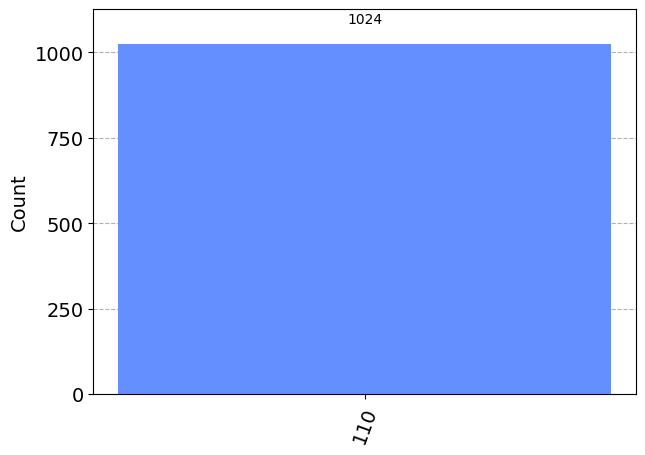

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()
counts = result.get_counts(qc)
plot_histogram(counts)

In [ ]:
# Convert the binary result to decimal
count_binary_reversed = list(counts.keys()) # The following lines of code is to reverse the key in the counts dictionary
count_binary_reversed = count_binary_reversed[0]
count_binary = count_binary_reversed[::-1]
del counts[count_binary_reversed]
counts[count_binary] = 1024

d = int(list(counts.keys())[0],2) # 4 * 0 + 2 * 1 + 1 * 1 = 3
print("Difference, d:", d)

Difference, d: 3


## The End